<a href="https://colab.research.google.com/github/fabioolivei/Fabio_Olivei_Data_Sciense/blob/main/Analisando_os_Dados_do_Airbnb_(Lisboa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Analisando os Dados do Airbnb - Lisboa

De acordo com o [Airbnb](https://news.airbnb.com/br/saiba-mais-sobre-o-airbnb/), a empresa nasceu em 2007, quando dois anfitriões receberam três hóspedes em sua casa em São Francisco. Hoje, conta com mais de 4 milhões de anfitriões, que já receberam mais de 1 bilhão de hóspedes em mais de 191 países. Todos os dias, os anfitriões oferecem acomodações e experiências únicas, que possibilitam aos hóspedes uma conexão mais autêntica com as comunidades.

Além disso, o Airbnb disponibiliza dados do site para algumas cidades através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), permitindo que sejam utilizados para projetos e soluções de Data Science.
<center><img alt="Analisando Airbnb" width="" src="https://cdn-images-1.medium.com/max/800/1*JVV_Rn8hjfhS_dMa8Tr5YQ.png"></center>

**Através deste *notebook*, faremos uma análise dos dados de Lisboa para obter insights valiosos a partir dos dados brutos disponíveis.**

# Por que viajar para Lisboa?

<center><img alt="Analisando Airbnb" width="" src="https://cdn-images-1.medium.com/max/800/1*26yeOZBCury5BcZpP23F7Q.jpeg"></center>

Imagine-se embarcando em uma viagem que te levará a um lugar onde as raízes da história do Brasil estão profundamente entrelaçadas. Ao chegar em Lisboa, sentirá imerso em uma atmosfera que ecoa a herança colonial que influenciou a formação da cultura brasileira. A arquitetura, a gastronomia e a hospitalidade calorosa dos lisboetas são aspectos que conectam Brasil e Portugal.

Explore museus de classe mundial, como o Museu Nacional do Azulejo e o Museu Nacional de Arte Antiga, e mergulhe na rica herança cultural da cidade. Experimente pratos tradicionais como o bacalhau, os pasteis de nata e os deliciosos frutos do mar frescos. Além disso, você pode acompanhar suas refeições com vinhos portugueses renomados. 

Lisboa é também um excelente ponto de partida para explorar outras partes de Portugal e até mesmo outros países europeus. É uma experiência que certamente deixará marcas profundas e enriquecedoras.




## OBTENÇÃO DOS DADOS

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Lisbon (good for visualisations).*

É **importante** notar que o [conjunto de dados](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-04-26/visualisations/listings.csv) utilizado neste notebook pode não estar mais disponível, com dados diferentes devido à evolução do portal. No entanto, foi disponibilizado um link alternativo para que você possa acessar o [conjunto de dados](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-04-26/visualisations/listings.csv) utilizado neste projeto.

Porem, é possível ver clicando [aqui](https://www.dropbox.com/s/qi8uqehevt0c42v/listings%20%281%29.csv?dl=0) o conjunto que foi utilizado, para que você sempre consiga utilizar esse material.

Agora, vamos dar continuidade ao projeto.


In [4]:
# importar os pacotes necessarios
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [5]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2023-03-19/visualisations/listings.csv")

## ANÁLISE DOS DADOS

Nesta etapa inicial, nosso objetivo é obter uma visão geral e ter uma compreensão do formato e estrutura dos dados. Isso nos ajudará a ter uma consciência situacional e um entendimento inicial de como os dados estão organizados.


**Dicionário das variáveis**

* `id` - O número de ID é um identificador único atribuído a cada imóvel 
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - imóveis categorizados em seus respectivos bairros com base em suas coordenadas geográficas.
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

OBS: Clicando [aqui](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing), é possível ver o dicionário completo. 

Como ponto inicial, vamos verificar o nosso *dataset*, analisando as 5 primeiras entradas.

In [6]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,45558745,FLH Baixa-Chiado Library Loft,3953109,Feels Like Home,Lisboa,Santa Maria Maior,38.710320,-9.138140,Entire home/apt,161,1,28,2023-03-07,1.32,306,288,17,35073/AL
1,33179882,Palm Guesthouse,152854735,Luis,Cascais,Cascais e Estoril,38.699930,-9.421570,Private room,81,5,0,NaN,NaN,5,290,0,18808/AL
2,836176843011037443,"Lisbon, renewed T1 apartment with pateo near M...",185689002,GAL - Gestão De Alojamento Local,Lisboa,Arroios,38.720987,-9.137193,Entire home/apt,94,1,0,NaN,NaN,20,262,0,50802/AL
3,1199811,Best Deal Lisboa Alfama Fado apart.,6552656,Francisco,Lisboa,Santa Maria Maior,38.710540,-9.130080,Entire home/apt,77,3,264,2023-03-16,2.31,1,255,59,46120/AL
4,26093410,Santa Liberdade Flat - Liberdade Avenue at Lisbon,348308512,Margarida,Lisboa,Santo Antnio,38.720410,-9.144350,Entire home/apt,110,3,1,2019-09-15,0.02,4,0,0,64304/AL


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Para ver a quantidade de entradas que nosso conjunto de dados possui, utilizamos no código o `shape`, correspondente as colunas e linhas. Para observar os tipos da coluna é usado `dtypes`

Este *dataset* utilizado é a versão "resumida" do Airbnb. Na mesma página que foi baixado o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [7]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 20097
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A presença de valores ausentes em um conjunto de dados pode afetar a análise e interpretação dos resultados, tornando-se necessário lidar com essas lacunas de forma adequada. É fundamental realizar uma análise cuidadosa para determinar a melhor abordagem para tratar os valores ausentes, garantindo assim a qualidade e confiabilidade dos dados.

* As variáveis `reviews_per_month` e `last_review` possuem valores nulos, aproximadamente 0,1%.
* As variáveis `name` e `license` estão abaixo de 0,1% dos valores nulos.

Como se pode ver há uma porcentagem bem pequena de valores ausentes em poucas variáveis.

In [8]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

reviews_per_month                 0.115639
last_review                       0.115639
license                           0.059561
name                              0.000448
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

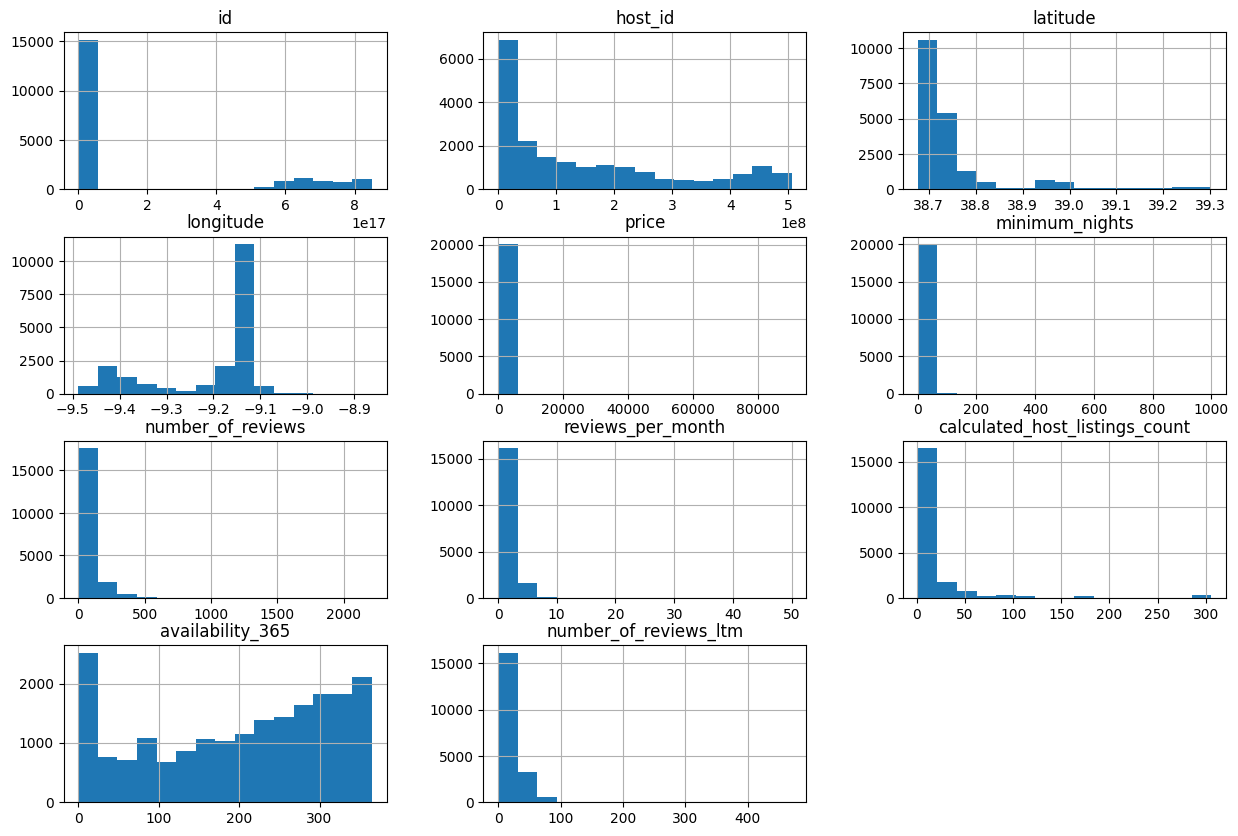

In [9]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize= (15,10));

### **Q4. Há *outliers* presentes?**

Ao observar o histograma das variáveis` price`, `minimum_nights` e `calculated_host_listings_count`, podemos identificar indícios da presença de *outliers*. Esses valores não seguem uma distribuição e causam distorções na representação gráfica (repare como estão somente direcionando os valores para esquerda). Para confirmar essa suspeita, existem duas maneiras rápidas que podem auxiliar na detecção de outliers.

São elas:

* Resumo estatístico como média (mean), desvio padrão (std), mediana, entre outras, por meio do método `describe()`
* Plotar `boxplots` correspondente as variáveis para analisarmos o gráfico.

***OBS:*** **No histograma, podemos ver essa mesma tendência para a esquerda em outras variáveis também, porém é necessário analisar o contexto geral, utilizar métodos de confirmação afim de compreender a importância e o quanto influencia no trabalho como um todo.** 

In [10]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,20097.000000,20097.000000,20097.000000,17773.000000,20097.000000,20097.000000
mean,139.684082,4.233219,58.604518,1.430895,17.871075,199.480420
std,874.040097,16.959417,87.876376,1.421123,43.592433,117.121157
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,63.000000,1.000000,4.000000,0.400000,1.000000,96.000000
50%,90.000000,2.000000,23.000000,1.010000,4.000000,222.000000
75%,136.000000,3.000000,74.000000,2.070000,14.000000,302.000000
max,90400.000000,1000.000000,2213.000000,49.990000,306.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 136, porém seu valor máximo é 90400.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano. O que confirma a presença de *outliers*. 

#### Boxplot para minimum_nights


minimum_nights: valores acima de 30:
336 entradas
1.6719%


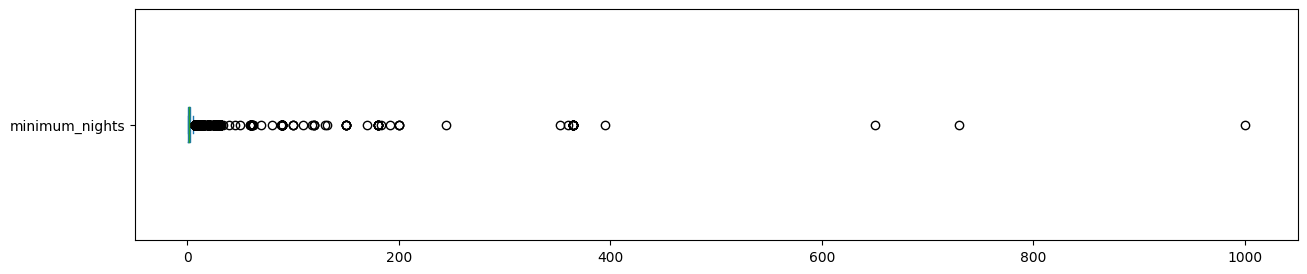

In [11]:
# minimum_nights
df.minimum_nights.plot(kind='box',  vert=False, figsize=(15, 3))
plt.show

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

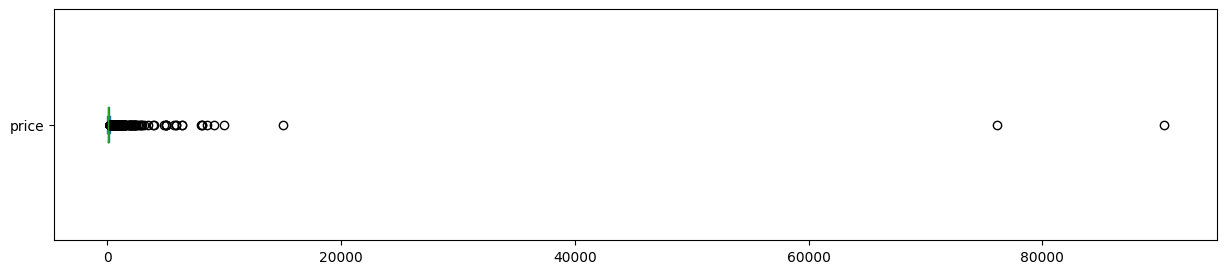


price: valores acima de 1500
52 entradas
0.2587%


In [12]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers* (Removendo os *outliers*)

Uma vez que identificamos a presença de *outliers* nas variáveis `price` e `minimum_nights`, vamos proceder com a remoção desses valores do DataFrame e em seguida, plotar novamente o histograma. Dessa forma, teremos uma representação mais precisa e sem distorções das distribuições dessas variáveis.

Você sabe o que é um histograma?
O histograma, também chamado de distribuição de frequências, é uma representação gráfica em forma de colunas ou barras que mostra a distribuição de um conjunto de dados. Se você quer entender melhor sobre, [clique aqui](https://pt.wikipedia.org/wiki/Histograma).

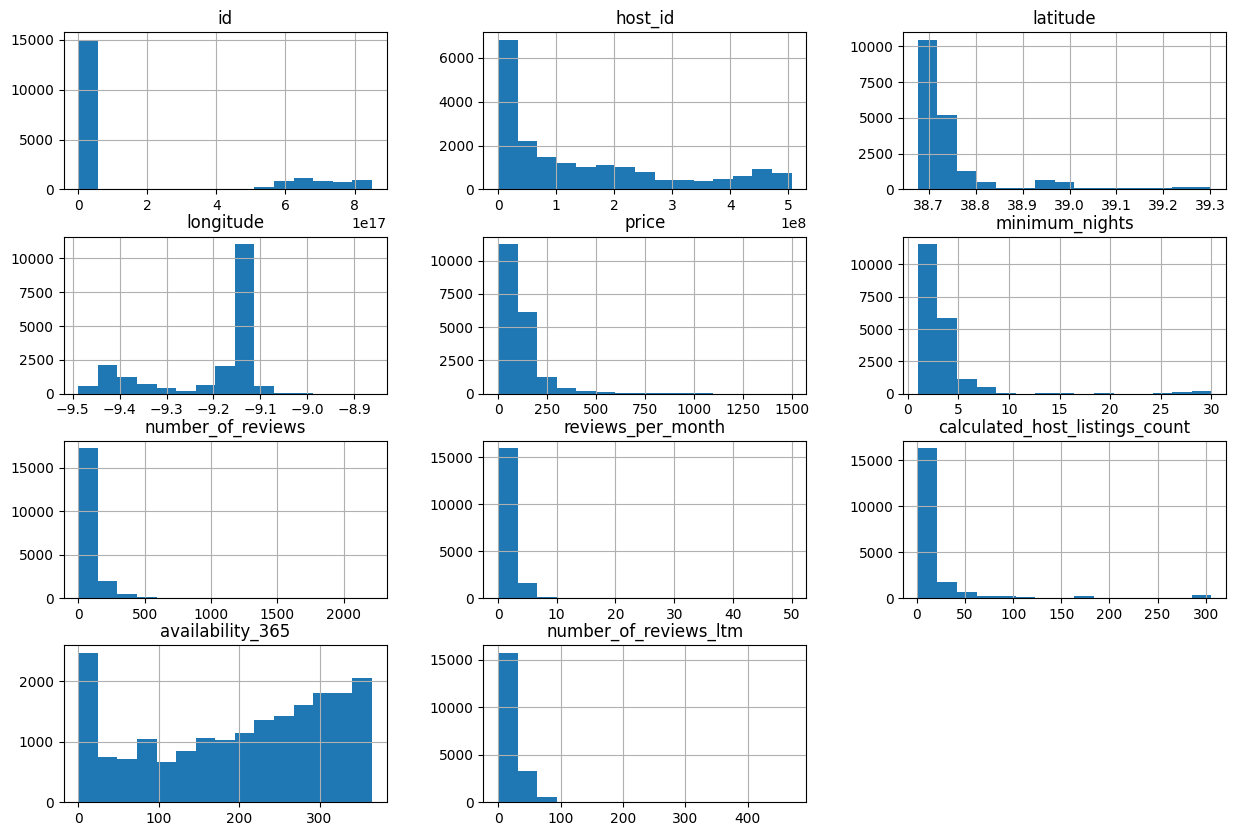

In [13]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

A correlação refere-se à existência de uma relação ou semelhança entre duas variáveis. 

No contexto em questão, estamos interessados em encontrar essa relação ou semelhança entre as variáveis. Essa relação pode ser quantificada usando o coeficiente de correlação, que determina a intensidade dessa relação. Portanto, para identificar as correlações entre as variáveis de interesse, realizaremos uma análise para determinar o grau de associação entre elas.

* Criando uma matriz de correlação
* Gerando um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [14]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.022073,-0.099466,-0.108012,-0.000072,0.069562
minimum_nights,-0.022073,1.000000,-0.090115,-0.161629,-0.082820,-0.085075
number_of_reviews,-0.099466,-0.090115,1.000000,0.648939,-0.079857,-0.059668
reviews_per_month,-0.108012,-0.161629,0.648939,1.000000,-0.037650,0.048480
calculated_host_listings_count,-0.000072,-0.082820,-0.079857,-0.037650,1.000000,0.064859
availability_365,0.069562,-0.085075,-0.059668,0.048480,0.064859,1.000000


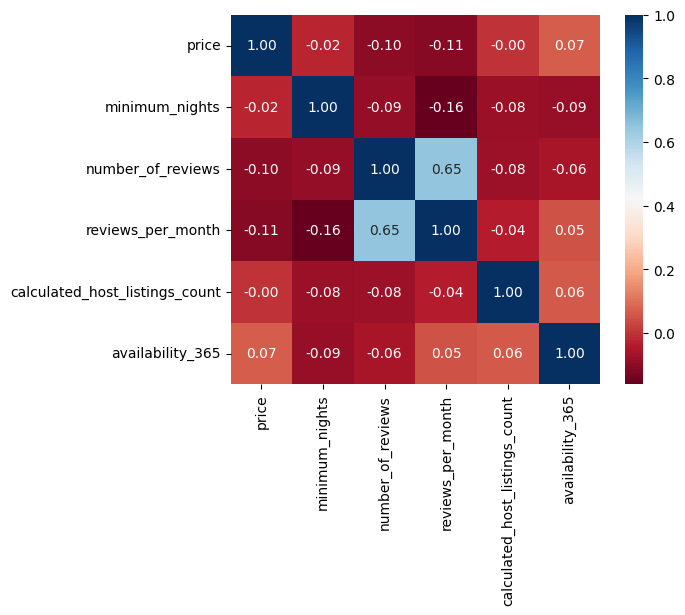

In [15]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [16]:
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19710.000000,19710.000000,19710.00000,17624.000000,19710.000000,19710.000000
mean,121.670979,3.028311,59.55449,1.438790,17.051344,199.424252
std,123.023883,4.036694,88.31057,1.423341,43.046093,116.939565
min,0.000000,1.000000,0.00000,0.010000,1.000000,0.000000
25%,62.000000,1.000000,5.00000,0.410000,1.000000,96.000000
50%,90.000000,2.000000,24.00000,1.020000,4.000000,222.000000
75%,135.000000,3.000000,76.00000,2.080000,14.000000,302.000000
max,1500.000000,30.000000,2213.00000,49.990000,306.000000,365.000000


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação disponível no Airbnb. Existem diferentes opções, como alugar apartamentos ou casas inteiras, alugar apenas um quarto ou até mesmo compartilhar um quarto com outras pessoas. Essa informação ajuda a identificar o tipo de acomodação oferecida aos usuários no site do Airbnb.

Vamos utilizar o método `value_counts()` para contar a quantidade de ocorrências de cada tipo de aluguel. Isso nos permitirá verificar quantas vezes cada tipo de acomodação (como apartamentos inteiros, quartos individuais, etc.) aparece nos dados.

As categorias que mais aparecem são:


1.   Casa/Apt inteiros
2.   Quartos privados
3.   Quartos compartilhados
4.   Quartos de Hotel

In [17]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    15024
Private room        4221
Shared room          236
Hotel room           229
Name: room_type, dtype: int64

In [18]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.762253
Private room       0.214155
Shared room        0.011974
Hotel room         0.011618
Name: room_type, dtype: float64

 <center><img alt="Analisando Airbnb" width="25%" src="https://d12vzecr6ihe4p.cloudfront.net/media/968497/salary-report-stat-76.png"></center>  
  <center>76% Casas/Apts inteiros (Entire home/apt)</center> 

Em Lisboa, Casas/Apts inteiros foi a opção com mais  imóveis disponíveis, com aproximadamente 76%, seguido da opção de quartos privados com 21% dos imóveis anunciados. O restante são quartos compartilhados e quartos de hotéis respectivamente. 

A opção com mais porcentagem trata-se de uma locação em que os hóspedes têm acesso exclusivo a uma casa, apartamento ou propriedade completa durante sua estadia, o que é positivo para aqueles que preferem a privacidade e o conforto de um espaço maior.  

### **Q6. Qual a localidade mais cara de Lisboa?**

Uma maneira de comparar uma variável em relação a outra é utilizando o método `groupby()`. No caso específico, queremos comparar os bairros (*neighbourhoods*) com base no preço de locação. Isso significa que iremos agrupar os dados por bairros e em seguida, analisar e comparar os preços das locações em cada um desses grupos. Essa abordagem nos permitirá identificar possíveis diferenças nos preços de locação entre os diferentes bairros.

In [19]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Alguber                                            630.000000
Cardosas                                           353.000000
Aveiras de Baixo                                   335.000000
Alhandra, So Joo dos Montes e Calhandriz           239.900000
Ribamar                                            239.043478
Enxara do Bispo, Gradil e Vila Franca do Rosrio    231.866667
Reguengo Grande                                    229.100000
Colares                                            201.814016
Santa Brbara                                       195.575758
Pvoa de Santa Iria e Forte da Casa                 184.666667
Name: price, dtype: float64

Podemos ver que o bairro *Alguber* está com o valor mais alto. 

É importante ter cuidado ao interpretar os resultados de uma análise, pois uma amostra pode ser ***não-representativa***. Então irei fazer uma análise mais aprofundada para confirmar a relevância das localidades com base na quantidade de anúncios(entradas).

Checando quantas entradas tem em cada uma destas 10 localidades.


In [20]:
# Quantidade de anúncios nas localidades de maior preço
for f in (df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:20].index):
  print(" {} :".format(f), df_clean[df_clean.neighbourhood == f].shape[0])  

 Alguber : 1
 Cardosas : 1
 Aveiras de Baixo : 2
 Alhandra, So Joo dos Montes e Calhandriz : 10
 Ribamar : 23
 Enxara do Bispo, Gradil e Vila Franca do Rosrio : 15
 Reguengo Grande : 20
 Colares : 371
 Santa Brbara : 33
 Pvoa de Santa Iria e Forte da Casa : 6
 Azambuja : 1
 Porto Salvo : 6
 Freiria : 3
 Dois Portos e Runa : 7
 Carvoeira e Carmes : 4
 Vila Nova da Rainha : 2
 Cadaval e Pro Moniz : 12
 Vale do Paraso : 2
 Cascais e Estoril : 1377
 Alcabideche : 159


Há apenas 1 entrada para o valor mais alto representado por ***Alguber***.

Podemos constatar que a amostra é insuficiente ou não representativa dessa região específica de Lisboa. Isso ressalta a importância de considerar o tamanho da amostra e a representatividade dos dados ao realizar análises e tirar conclusões sobre determinadas áreas ou bairros.

A quantidade de entradas nas outras localidades com preços mais altos também é muito baixa. Para comprovar essa afirmação, vou analisar as localidades com maior quantidade de entradas. 


In [21]:
# Localidades com mais entradas
df_clean.neighbourhood.value_counts()[:10]

Santa Maria Maior                                    3178
Misericrdia                                          2330
Arroios                                              1718
Cascais e Estoril                                    1377
So Vicente                                           1096
Santo Antnio                                         1092
Estrela                                               831
Ericeira                                              698
S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim     569
Avenidas Novas                                        507
Name: neighbourhood, dtype: int64

É possível notar que nenhuma das localidades anteriores aparecem na lista atual. Comprovando a necessidade de uma análise mais profunda.  

Fazer uma lista das localidades com maiores entradas será mais significativo neste caso, devido a não representividade dos dados anteriores. 


In [28]:
# Criando uma lista chamada neighb. Selecionando primeiros 10 índices com maior contagem de valores na coluna "neighbourhood" do DataFrame df_clean. 
# O método value_counts() é aplicado à coluna "neighbourhood" para contar quantas vezes cada valor aparece. 
# O slicing [:10] é utilizado para obter apenas os 10 primeiros valores com a contagem mais alta.
# Dentro do loop, cada valor é adicionado à lista neighb usando o método append().
neighb = []
for f in df_clean.neighbourhood.value_counts()[:10].index:
  neighb.append(f)

neighb

['Santa Maria Maior',
 'Misericrdia',
 'Arroios',
 'Cascais e Estoril',
 'So Vicente',
 'Santo Antnio',
 'Estrela',
 'Ericeira',
 'S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim',
 'Avenidas Novas']

In [29]:
# Criando uma lista chamada list_mean vazia. Em seguida, ele itera sobre os valores da lista neighb.
# Imprimindo a média dos preços agrupados pela coluna "neighbourhood" e ordenados de forma descendente.
# "neighbourhood" é igual a f
# Calculando a média dos preços com groupby('neighbourhood').price.mean()[0]. O [0] é usado para acessar o valor da média resultante
# Um novo DataFrame chamado df_neighb é criado com base nas listas neighb e list_mean usando a função pd.DataFrame() 
list_mean = []
for f in neighb:
#  print(df_clean.neighbourhood.groupby(f).price.mean().sort_values(ascending=False))
  mean = round(df_clean[df_clean.neighbourhood == f].groupby('neighbourhood').price.mean()[0], 2)
  list_mean.append(mean)
  df_neighb = pd.DataFrame(list(zip(neighb,list_mean)), columns = ['Neighborhood','Mean'])

In [30]:
# Transformando o index
df_neighb.set_index('Neighborhood', inplace=True)

In [31]:
# Um novo DataFrame, mantendo as mesmas colunas e valores, mas com as linhas reordenadas de acordo com a coluna 'Mean' em ordem descendente.
df_neighb.sort_values(by = 'Mean', ascending=False)

,Mean
Neighborhood,
Cascais e Estoril,162.08
"S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim",158.46
Santa Maria Maior,127.65
Santo Antnio,127.11
Misericrdia,122.37
Estrela,117.73
Ericeira,112.54
Arroios,110.28
Avenidas Novas,108.89


Agora sim podemos dizer que temos dados mais representativos. Entre os 10 bairros com mais entradas, esta é a média de preços. 

Vamos realizar uma análise comparativa para verificar se a média de preços geral, se aproxima da média dos bairros mais relevantes em termos de número de entradas.

In [26]:
df_clean.price.describe()

count    19710.000000
mean       121.670979
std        123.023883
min          0.000000
25%         62.000000
50%         90.000000
75%        135.000000
max       1500.000000
Name: price, dtype: float64

A média de preços de 121,67 parece realmente representar adequadamente a média dos anúncios mais significativos.

É possível agora analisar estátisticamente melhor os dados e responder questões como essa por exemplo. 

# Quais são as localidades de alto e baixo custo para hospedagem em Lisboa? 

***Entre os 10 bairros selecionandos, o mais caro foi Cascais e Estoril com média de €162.08***

[Cascais e Estoril]("https://discoverportugal2day.com/oeste-estoril-cascais/") são conhecidas pelas suas riquezas naturais e históricas, como o belo litoral, fortalezas, igrejas e edifícios históricos datados do século XV. O Casino Estoril é um dos maiores cassinos da Europa e foi o cenário do romance de James Bond “Casino Royale”. Destino muito procurado pelos turistas, o que reflete a questão de ser uma das localidades mais caras e com muitas entradas, anúncios de imóveis. 

 <center><img alt="Estoril" width="" src="https://a.travel-assets.com/findyours-php/viewfinder/images/res60/233000/233546-Rainha-Beach.jpg"></center>  

***O mais barato, São Vicente com média de €101.25*** 

[São Vicente]("https://visiteomundo.com/atividades/europa/portugal/sao-vicente/") é uma freguesia portuguesa do município de Lisboa, e  tem várias atrações turísticas, como suas praias, que são ideais para esportes aquáticos, pesca e mergulho. A cidade também tem vários parques, museus e igrejas históricas, que convidam os visitantes a conhecer a sua cultura e história.

<center><img alt="Estoril" width="" src="https://c4.wallpaperflare.com/wallpaper/977/11/712/cabo-de-sao-vicente-faro-wallpaper-preview.jpg"></center>  

**Para saber o valor em reais é só converter com o google clicando** [aqui](https://www.google.com/search?q=euro+converter&oq=euro+converter&aqs=chrome..69i57.13951j0j7&sourceid=chrome&ie=UTF-8) 


[***Cascais***]("https://www.nacionalidadeportuguesa.com.br/cascais-em-portugal/") é um município independente localizado na região metropolitana de Lisboa, em Portugal. No entanto, é importante ressaltar que ***Cascais e Estoril*** são freguesias pertencentes ao município de ***Cascais***. Uma [freguesia]("https://pt.wikipedia.org/wiki/Freguesia") é a menor divisão administrativa em Portugal, sendo geralmente menor do que uma cidade e com menos serviços e comércio.

 <center><img alt="Estoril" width="" src="https://c4.wallpaperflare.com/wallpaper/647/473/262/tourism-house-casa-de-santa-maria-marina-wallpaper-preview.jpg"></center>  

Embora ***Cascais e Estoril*** não sejam exatamente bairros como em outras cidades, eles são áreas próximas que podem ser facilmente confundidas como bairros de Lisboa. A distância entre Cascais e Lisboa é de aproximadamente 32 km e de São Vicente é um pouco maior, sendo de 330 km.  


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

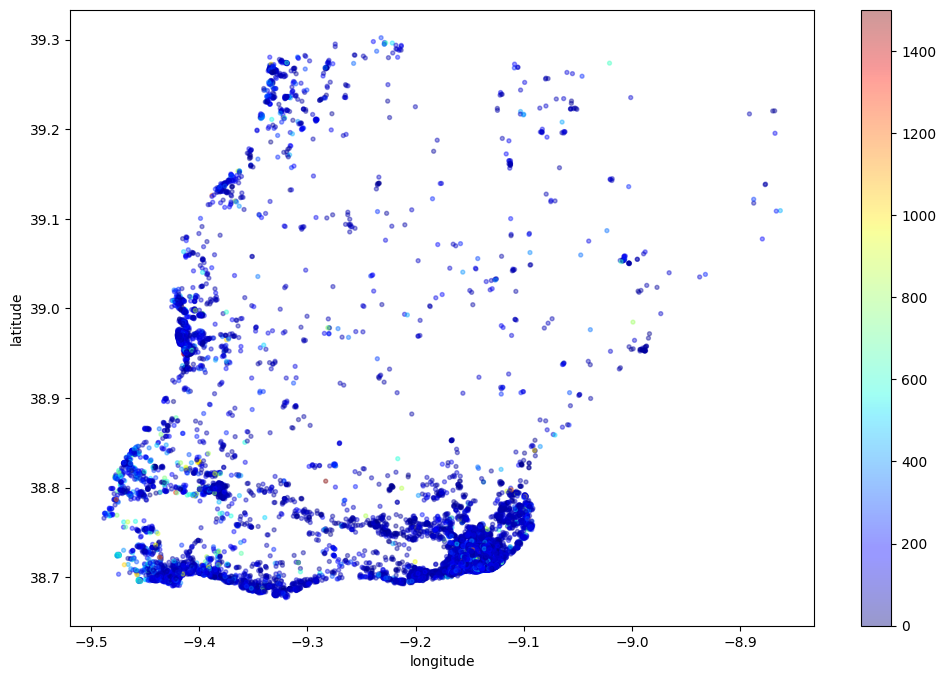

In [27]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## CONCLUSÕES


A análise inicial da base de dados do Airbnb revelou a presença de outliers em algumas variáveis. Que foram tratados para garantir a qualidade e confiabilidade dos resultados obtidos. 

Ao examinar os maiores valores anunciados em cada bairro, notou-se uma considerável disparidade nos preços. Verificou-se que esses bairros tinham poucos anúncios, o que resultava em uma média de preços inflada. Sendo necessário uma análise focada nos bairros com maior número de anúncios, que permitiu chegar a uma média de preços que reflete de forma mais precisa a realidade dessa amostra específica.

Com base nos dados e análises realizadas, observamos que a maioria das propriedades em Lisboa listadas no Airbnb são casas ou apartamentos completos disponíveis para alugar. Além disso, há também um número significativo de quartos privados disponíveis. Podemos definir também a média do maior e menor valor referente aos 10 bairros.

Com certeza nesta análise foi possível ver a importância da limpeza dos dados que desempenha um papel crucial no processo de análise, ajudando a obter informações confiáveis, precisas e consistentes para tomar decisões informadas obtendo insights relevantes.

Vale ressaltar que esse conjunto de dados é uma versão resumida, adequada apenas para uma abordagem preliminar. Para uma análise exploratória mais abrangente, é recomendado utilizar o conjunto de dados completo, que possui 106 atributos disponíveis.
